## 1. Getting the Libraires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # For saving the model


## 2. Getting the Dataset and Exploring the Data

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

# Check the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nData Information:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics of numerical features
print("\nStatistics of numerical features:")
print(df.describe())


First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         938

## 3.Understanding the Data

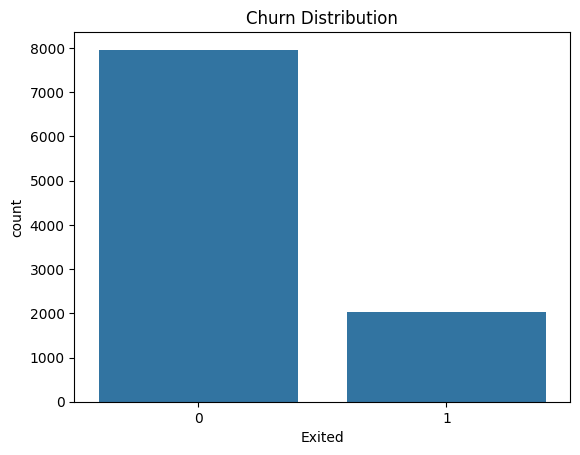

In [ ]:
# Target variable distribution
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution")
plt.show()


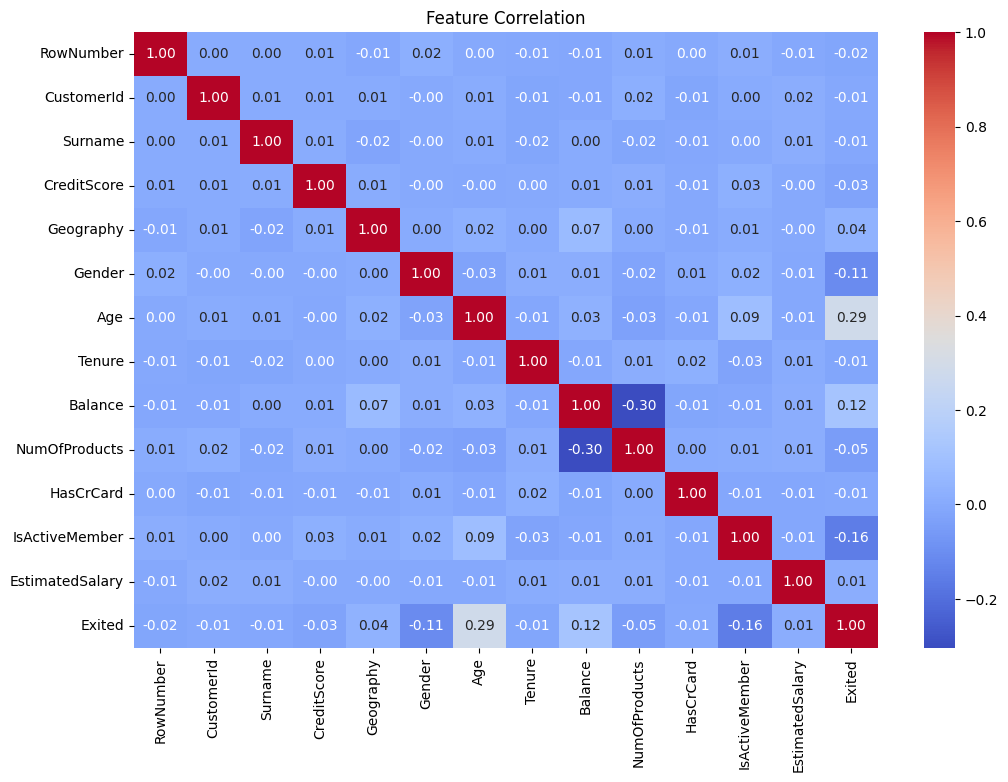

In [ ]:
# Heatmap to visualize correlation
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


## 4, Data Cleaning

In [ ]:
# List categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding for simplicity
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed

print("\nCategorical features after encoding:")
print(df.head())



Categorical features after encoding:
   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          2       0   41   
2          3    15619304     2040          502          0       0   42   
3          4    15701354      289          699          0       0   39   
4          5    15737888     1822          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3   

### Scaling Numerical Features

In [ ]:
# List numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nData after scaling numerical features:")
print(df.head())



Data after scaling numerical features:
   RowNumber  CustomerId   Surname  CreditScore  Geography    Gender  \
0  -1.731878   -0.783213 -0.464183    -0.326221  -0.901886 -1.095988   
1  -1.731531   -0.606534 -0.390911    -0.440036   1.515067 -1.095988   
2  -1.731185   -0.995885  0.628988    -1.536794  -0.901886 -1.095988   
3  -1.730838    0.144767 -1.440356     0.501521  -0.901886 -1.095988   
4  -1.730492    0.652659  0.371354     2.063884   1.515067 -1.095988   

        Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  0.293517 -1.041760 -1.225848      -0.911583   0.646092        0.970243   
1  0.198164 -1.387538  0.117350      -0.911583  -1.547768        0.970243   
2  0.293517  1.032908  1.333053       2.527057   0.646092       -1.030670   
3  0.007457 -1.387538 -1.225848       0.807737  -1.547768       -1.030670   
4  0.388871 -1.041760  0.785728      -0.911583   0.646092        0.970243   

   EstimatedSalary    Exited  
0         0.021886  1.977165  
1 

### Splitting Test Train

In [ ]:
# Split into features and target
X = df.drop(columns=['Exited'])  # Replace 'Churn' with your target column name
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of Train and Test Sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)



Shape of Train and Test Sets:
X_train: (8000, 13) X_test: (2000, 13)
y_train: (8000,) y_test: (2000,)


## 5.Model Traning

In [ ]:
# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("\nModel training complete.")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
print(y_train.unique())  # Display unique values in the target column
print(y_train.dtypes)    # Check the data type of the target column


[-0.50577476  1.97716468]
float64


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("\nModel training complete.")



Model training complete.


## 6.Model Evaulation

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.8655
Confusion Matrix:
 [[1552   55]
 [ 214  179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## 7. Saving and Loading the model

In [ ]:
# Save the model
joblib.dump(model, 'gradient_boosting_churn_model.pkl')
print("\nModel saved as 'gradient_boosting_churn_model.pkl'.")

# Save encoders and scaler
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Encoders and scaler saved.")

# Load the model
loaded_model = joblib.load('gradient_boosting_churn_model.pkl')
print("\nModel loaded successfully.")



Model saved as 'gradient_boosting_churn_model.pkl'.
Encoders and scaler saved.

Model loaded successfully.
